# Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

# 1. Importing Dataframes

In [2]:
# Setting variables
path = r'/Users/saikathalder/CareerFoundry/Data Immersion/Achievement 4/Instacart Basket Analysis 01182024'
# Importing Merged Dataframe
df_combined= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_final.pkl'))

In [3]:
# Verifying Dataframe
df_combined.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income,...,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,spending_flag,median_reorder,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid range products,Busiest days,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid range products,Regulary busy,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid range products,Busiest days,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low range products,Regulary busy,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low range products,Slowest days,Most orders,8,New customer,12.6,High spender,19.0,Regular customer,both


In [4]:
# droppping '_merge' column
df_combined = df_combined.drop(columns = '_merge')


In [4]:
# Verifying columns
df_combined.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_label', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_product_price', 'spending_flag',
       'median_reorder', 'order_frequency_flag', '_merge'],
      dtype='object')

# 2. Following Insrtuctions to generate  bar chart, histogram, sample data, line chart 

## 2.1 Bar Chart

### Bar Chart for oders_day_of_week

[Text(0, 0, 'Saturday'),
 Text(0, 1, 'Sunday'),
 Text(0, 2, 'Monday'),
 Text(0, 3, 'Tuesday'),
 Text(0, 4, 'Wednesday'),
 Text(0, 5, 'Thursday'),
 Text(0, 6, 'Friday')]

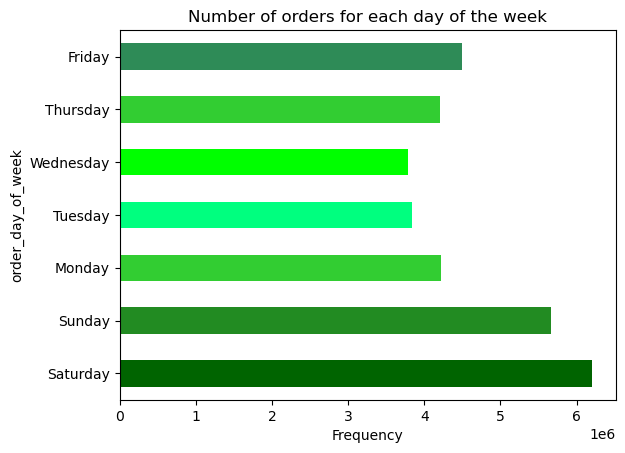

In [5]:
# Define the day names
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Creating Bar Chart for orders_day_of_week with sorting and color and assigning to 'bar'
bar_horzinotnal_order_day_of_week = df_combined['order_day_of_week'].value_counts().sort_index().plot.barh(color=['darkgreen', 'forestgreen', 'limegreen', 'springgreen', 'lime', 'limegreen', 'seagreen'])

# Set label and title
bar_horzinotnal_order_day_of_week.set(ylabel='order_day_of_week', xlabel='Frequency', title='Number of orders for each day of the week')

# Replace x-axis tick labels
bar_horzinotnal_order_day_of_week.set_yticklabels(day_names)



In [6]:
# Exporting the chart as an image
bar_horzinotnal_order_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Bar Chart for price_lable

In [7]:
df_combined['price_label'].value_counts(dropna = True)

price_label
Mid range products     21860860
Low range products     10126321
High range products      417678
Name: count, dtype: int64

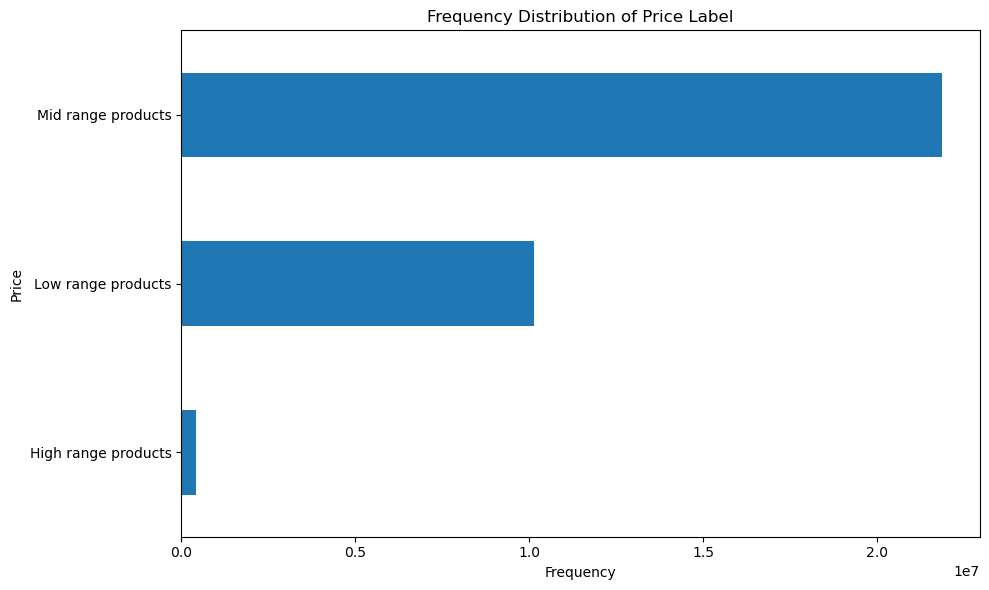

In [8]:
# Creating Bar Chart for price_label to show the frequency Distribution
bar_price_label = df_combined['price_label'].value_counts().sort_index().plot.barh(figsize=(10, 6))

# Set label and title
bar_price_label.set(ylabel='Price', xlabel='Frequency', title='Frequency Distribution of Price Label')

# Ensure tight layout
plt.tight_layout()



In [9]:
# Exporting the chart as an image
bar_price_label.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_label.png'))

## 2.2 Histogram

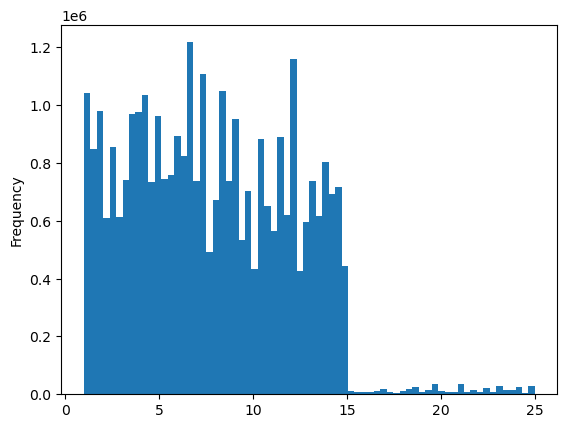

In [10]:
# Creating a Histogram for 'prices' using bin = 70
# Increasing the number of bins will allow us to see more variety in our histogram
hist_prices = df_combined['prices'].plot.hist(bins = 70)

In [9]:
# Exporting Histogram to an image file
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

## 2.3 Line Chart

### Creating Sampling Data with 70:30 Ratio for Line Chart

##### Creating a list in the form of boolean values for 70:30 split

In [11]:
# Set the seed for the random number generator
np.random.seed(4) # The seed represents a random but reproducible pattern.
# Create 32404859 random numbers(length of the dataframe)
    #np.random.rand(len(df_ords_prods_merge))
# Code a logical test comaring each of those numbers to a value of 0.70
    #np.random.rand(len(df_ords_prods_merge))<0.70
# Store the results of the test in a new list, dev, in the form of boolean values.
dev = np.random.rand(len(df_combined))<0.70

###### Split the dataframe into two samples

In [12]:
# Store 70% of the sample in the dataframe big
big =  df_combined[dev] # Stores data which has a True Value in dev
#Store 30% if the sample in the dataframe small
small =  df_combined[~dev] # Store data which has a false value in dev

In [13]:
# Verifying if the dataframe splitting was correct
x=len(df_combined)
y= len(big) + len(small)

if x == y:
    print('The dataframe splitting was correct!')
else:
    print('Something is wrong! Please look at the logic again')

The dataframe splitting was correct!


##### Creating a subset with two columns only -  'order_day_of_week', 'prices'

In [26]:
df_small = small[['order_day_of_week', 'prices']] 

In [27]:
# Verifying new dataframe
df_small.head()

,order_day_of_week,prices
0,1,9.0
2,1,9.0
3,2,4.3
6,1,4.3
10,1,4.0


### Line Chart

/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


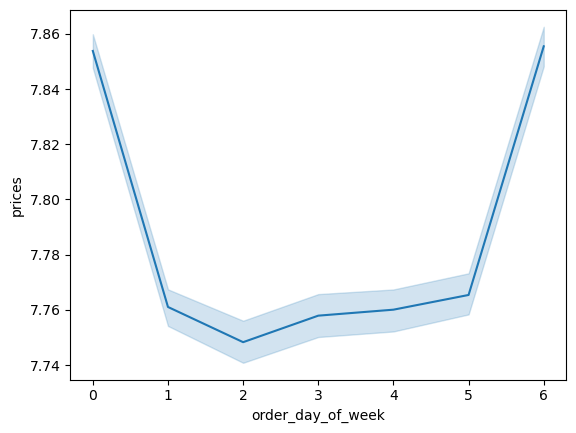

In [15]:
# Development of the 'prices' column across the days of the week.
# We will plot the 'order_day_of_week' column on the x-axis and the 'prices' column on the y axis
line = sns.lineplot(data = df_small, x= 'order_day_of_week', y = 'prices')

In [16]:
# Exporting the chart as an image
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_day_of_week.png'))

# 3. Histogram for 'order_hour_of_day'

[Text(0.5, 0, 'order_hour_of_day'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Number of orders per hour in Military Time')]

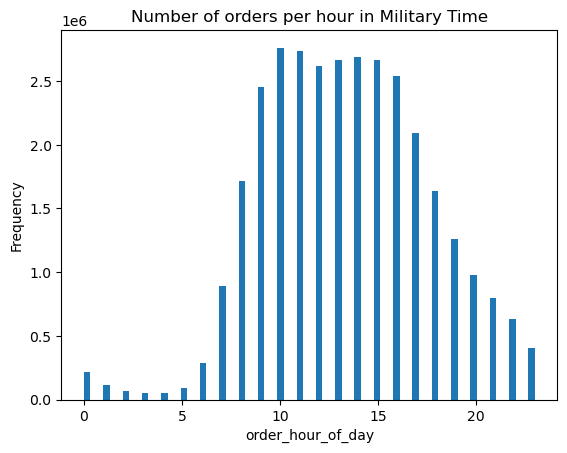

In [20]:
# Creating a Histogram for 'prices' using bin = 70
# Increasing the number of bins will allow us to see more variety in our histogram
hist_order_hour_of_day = df_combined['order_hour_of_day'].plot.hist(bins = 70)

# Set labels and title
hist_order_hour_of_day.set(xlabel = 'order_hour_of_day', ylabel = 'Frequency', title = 'Number of orders per hour in Military Time')


### The order frequency starts to increase at 7:00 AM in the morning and reaches its peak at 10:00 AM. The order frequency starts to decrease after 4:00 PM. The busiest time would be from 9:00 AM till 5:00 PM

In [21]:
# Exporting the chart as an image
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

# 4. Relationship between loyalty_flag and days_since_prior_order

In [40]:
df_combined.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'marital_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_label', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_product_price', 'spending_flag',
       'median_reorder', 'order_frequency_flag', '_merge'],
      dtype='object')

In [48]:
# Median number of days customers returns based on Loyalty Flags
avg_return_day_loyal = df_combined.groupby('loyalty_flag').agg({'days_since_prior_order':['mean']}).round()
# Viewing the result
avg_return_day_loyal

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.0
New customer,15.0
Regular customer,12.0


In [54]:
# Exporting to Excel
avg_return_day_loyal.to_clipboard()

### Bar Chart

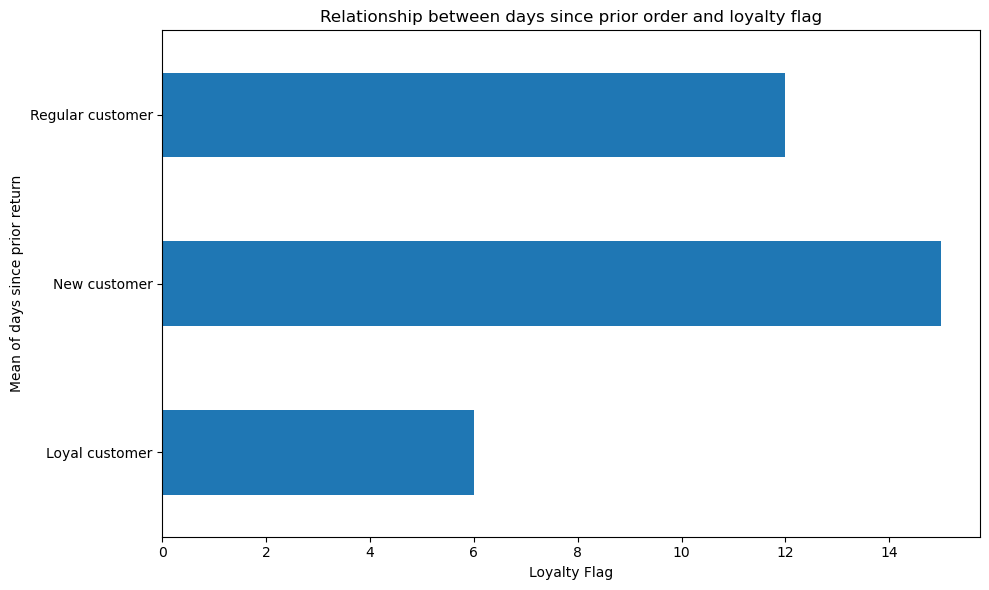

In [52]:
# Creating Bar Chart for loyalty_flag with sorting and color and assigning to 'bar_loyalty_flag'
bar_loyalty_flag_days_return = avg_return_day_loyal.plot.barh(figsize=(10,6),legend = False)

# Set labels and title
bar_loyalty_flag_days_return.set(xlabel = 'Loyalty Flag', ylabel = 'Mean of days since prior return', title = 'Relationship between days since prior order and loyalty flag')

# Ensure tight layout
plt.tight_layout()

In [53]:
# Exporting the chart as an image
bar_loyalty_flag_days_return.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag_days_return.png'))

# 5. Distribution of orders among customers in terms of loyalty

## Bar Chart

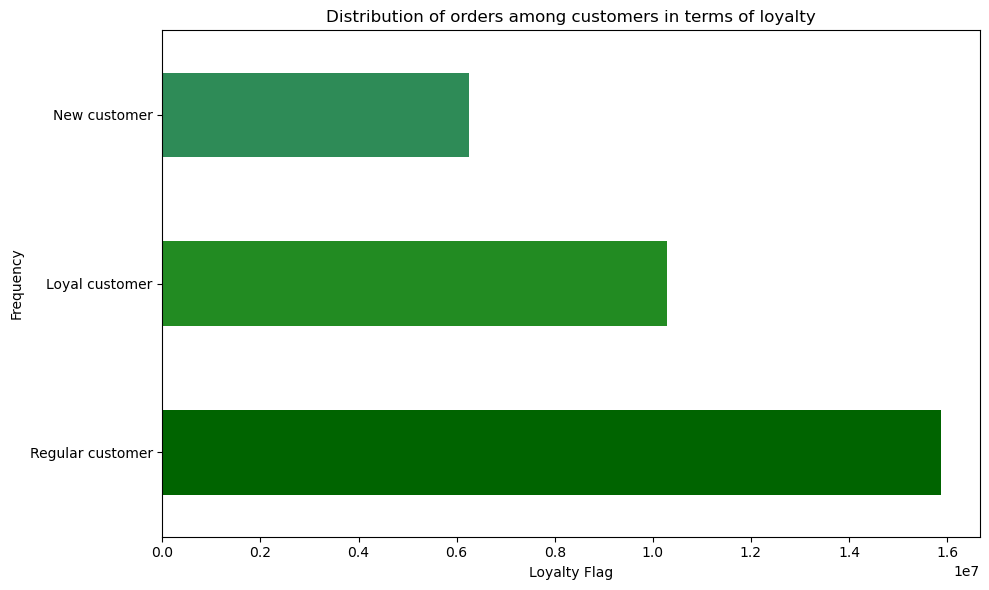

In [20]:
# Creating Bar Chart for loyalty_flag with sorting and color and assigning to 'bar_loyalty_flag'
bar_loyalty_flag = df_combined['loyalty_flag'].value_counts().plot.barh(figsize=(10,6),color = ['darkgreen', 'forestgreen', 'seagreen'])

# Set labels and title
bar_loyalty_flag.set(xlabel = 'Loyalty Flag', ylabel = 'Frequency', title = 'Distribution of orders among customers in terms of loyalty')

# Ensure tight layout
plt.tight_layout()


In [21]:
# Exporting the chart as an image
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### It seems Regular customers places the most orders followed by Loyal customers and New Customers

# 6. Finding Difference in expenditure depending on the hour of the day

## Using the sample data to create a subset with two columns only -  'order_hour_of_day', 'prices' 

In [28]:
df_small = small[['order_hour_of_day', 'prices']] 

In [29]:
# Verifying dataframe
df_small.head()

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,4.3
6,9,4.3
10,9,4.0


## Line Chart

/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Average price of products per hour of day')]

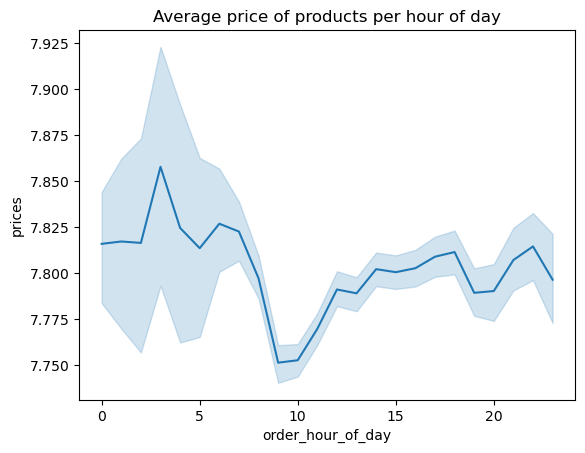

In [30]:
# Development of the 'prices' column across the order_hour_of_day.
# We will plot the 'order_hour_of_day' column on the x-axis and the 'prices' column on the y axis
line_order_hour_of_day = sns.lineplot(data = df_small, x= 'order_hour_of_day', y = 'prices')
line_order_hour_of_day.set(title = 'Average price of products per hour of day')

In [31]:
# Exporting the chart as an image
line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day.png'))

# 7. Explore connection between age and family

## Using the sample data to create a subset with two columns only -  'age', 'number_of_dependents'

In [24]:
df_small_6 = small[['age', 'number_of_dependents']] 

## Line Chart

In [30]:
df_small_6['number_of_dependents'].value_counts()

number_of_dependents
3    2438634
0    2430491
2    2426844
1    2425129
Name: count, dtype: int64

In [40]:
# Getting the mean of number of children grouped by age
grouped_df = df_small_6.groupby('age')['number_of_dependents'].mean().reset_index()
print(grouped_df)

    age  number_of_dependents
0    18              1.505999
1    19              1.570201
2    20              1.476357
3    21              1.501314
4    22              1.471374
..  ...                   ...
59   77              1.516981
60   78              1.435651
61   79              1.544928
62   80              1.519254
63   81              1.450985

[64 rows x 2 columns]


/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


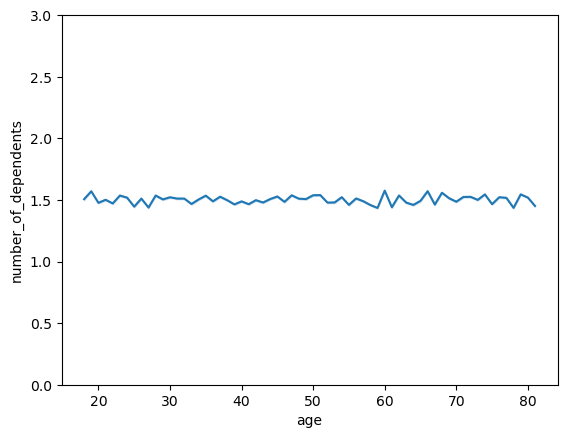

In [45]:
#Line Plot where age is the independent variable and number_of_dependents in the dependent variable
line_age_dependents_ylim = sns.lineplot(data = df_small_6, x= 'age', y = 'number_of_dependents')
#Set y axis range
plt.ylim(0,3)
# Show the line char
plt.show()

/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/saikathalder/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


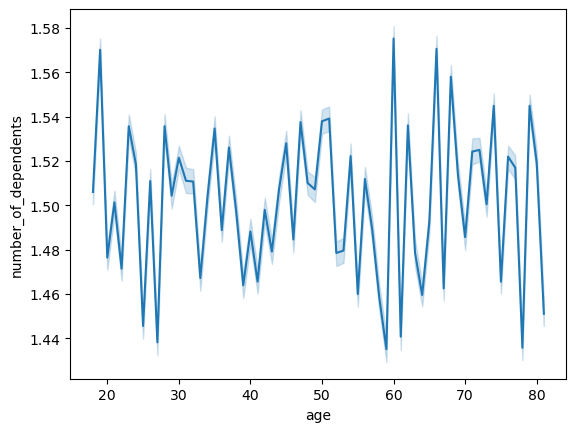

In [46]:
#Line Plot where age is the independent variable and number_of_dependents in the dependent variable
# We are not limiting the range for y axis
line_age_dependents = sns.lineplot(data = df_small_6, x= 'age', y = 'number_of_dependents')

In [47]:
# Exporting the chart as an image
line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))
line_age_dependents_ylim.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents_ylim.png'))

### There is no visibile relationship between age and number of dependents

# 8. Relationship between age and spending power

## Using the sample data to create a subset with two columns only -  'age', 'income'

In [41]:
df_small_7 = small[['age', 'income']] 

## Scatterplot

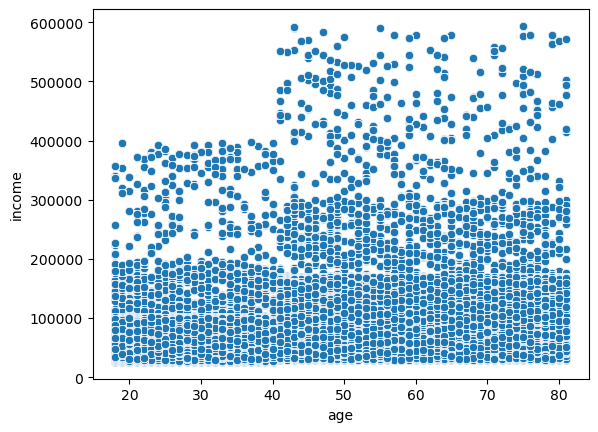

In [42]:
# Creating scatterplot between age and income
scplt_age_income = sns.scatterplot(data = df_small_7, x= 'age', y = 'income')

In [49]:
# Exporting the chart as an image
scplt_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scplt_age_income.png'))

### We can see that the income level is almost consistent between age 20 and 40.
### For Age between 20 and 40, while most individuals earn between 20000 to 200000, there are select few whose income level ranges from 200000 to 400000. 
### For Age between 40 to 80, we can see that individuals are earning way more where the maximum income level is around 600000.